In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


data, target = make_classification(
    n_samples=1000,
    n_features=20,
    n_classes=5,
    n_clusters_per_class=1,
    n_informative=15,
    random_state=42
)

In [2]:
categories = 5
encoded_labels = np.eye(categories)[target]

class NeuralNetworkModel:
    def __init__(self, input_size, hidden_layers, output_size, learning_rate=0.001):
        self.lr = learning_rate
        self.weights = [
            np.random.randn(input_size, hidden_layers[0]),
            np.random.randn(hidden_layers[0], hidden_layers[1]),
            np.random.randn(hidden_layers[1], hidden_layers[2]),
            np.random.randn(hidden_layers[2], output_size)
        ]

    @staticmethod
    def activation_function(x, derivative=False):
        if derivative:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    @staticmethod
    def softmax_function(x):
        shifted = x - np.max(x, axis=1, keepdims=True)
        exp_values = np.exp(shifted)
        return exp_values / np.sum(exp_values, axis=1, keepdims=True)

    def forward_propagation(self, inputs):
        self.layer_1 = self.activation_function(np.dot(inputs, self.weights[0]))
        self.layer_2 = self.activation_function(np.dot(self.layer_1, self.weights[1]))
        self.layer_3 = self.activation_function(np.dot(self.layer_2, self.weights[2]))
        self.output_layer = self.softmax_function(np.dot(self.layer_3, self.weights[3]))
        return self.output_layer

    def back_propagation(self, inputs, actual, predicted):
        error_output = actual - predicted
        delta_output = self.lr * error_output

        error_layer_3 = np.dot(delta_output, self.weights[3].T)
        delta_layer_3 = error_layer_3 * self.activation_function(self.layer_3, derivative=True)

        error_layer_2 = np.dot(delta_layer_3, self.weights[2].T)
        delta_layer_2 = error_layer_2 * self.activation_function(self.layer_2, derivative=True)

        error_layer_1 = np.dot(delta_layer_2, self.weights[1].T)
        delta_layer_1 = error_layer_1 * self.activation_function(self.layer_1, derivative=True)

        # Update weights
        self.weights[3] += np.dot(self.layer_3.T, delta_output)
        self.weights[2] += np.dot(self.layer_2.T, delta_layer_3)
        self.weights[1] += np.dot(self.layer_1.T, delta_layer_2)
        self.weights[0] += np.dot(inputs.T, delta_layer_1)

    def train_network(self, inputs, actual_labels):
        predictions = self.forward_propagation(inputs)
        self.back_propagation(inputs, actual_labels, predictions)

In [7]:

def accuracy(y_true, y_pred):
    return np.mean(np.argmax(y_true, axis=1) == np.argmax(y_pred, axis=1))

In [8]:
network = NeuralNetworkModel(input_size=20, hidden_layers=[64, 64, 64], output_size=categories)

epochs = 1000
losses = []
accuracies = []

for epoch in range(epochs):

    network.train_network(data, encoded_labels)

    predictions = network.forward_propagation(data)

    loss = np.mean((encoded_labels - predictions) ** 2)
    acc = np.mean(np.argmax(encoded_labels, axis=1) == np.argmax(predictions, axis=1))

    losses.append(loss)
    accuracies.append(acc)
    if epoch % 100 == 0 or epoch == epochs - 1:
        print(f"Epoch {epoch + 1}/{epochs}: Loss = {loss:.4f}, Accuracy = {acc:.4f}")

Epoch 1/1000: Loss = 0.3101, Accuracy = 0.1990
Epoch 101/1000: Loss = 0.0244, Accuracy = 0.9310
Epoch 201/1000: Loss = 0.0089, Accuracy = 0.9830
Epoch 301/1000: Loss = 0.0039, Accuracy = 0.9960
Epoch 401/1000: Loss = 0.0020, Accuracy = 0.9980
Epoch 501/1000: Loss = 0.0012, Accuracy = 0.9980
Epoch 601/1000: Loss = 0.0007, Accuracy = 0.9990
Epoch 701/1000: Loss = 0.0005, Accuracy = 1.0000
Epoch 801/1000: Loss = 0.0003, Accuracy = 1.0000
Epoch 901/1000: Loss = 0.0002, Accuracy = 1.0000
Epoch 1000/1000: Loss = 0.0002, Accuracy = 1.0000


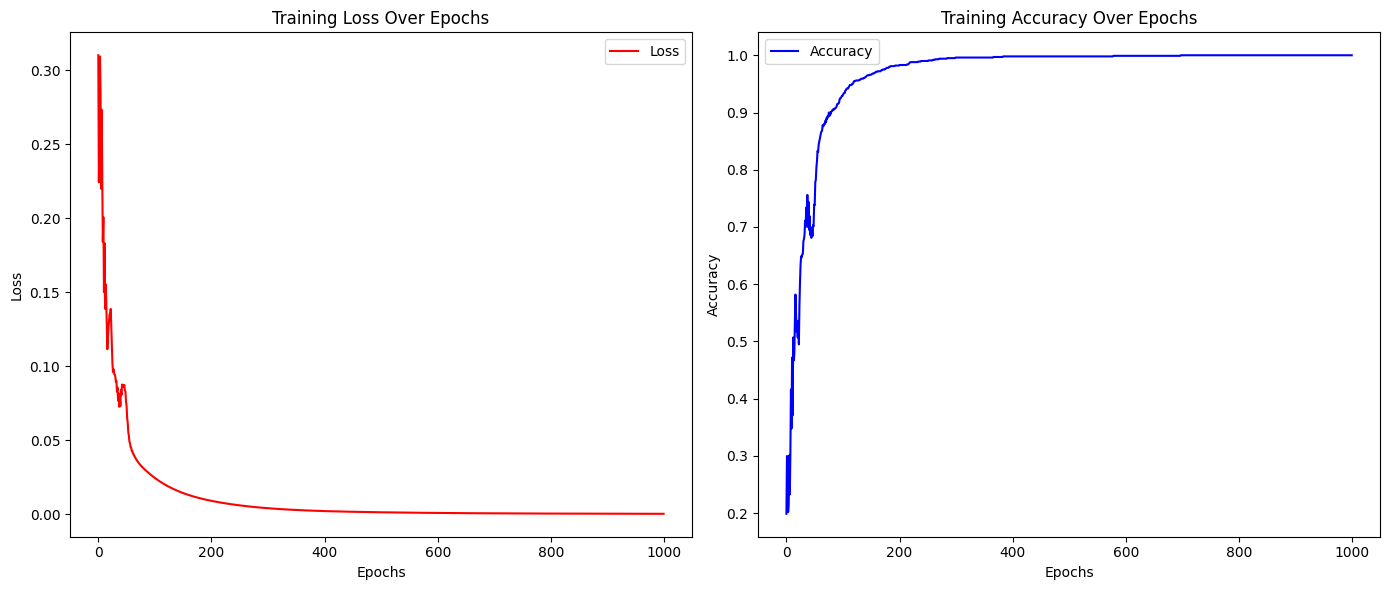

In [10]:

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), losses, label='Loss', color='red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), accuracies, label='Accuracy', color='blue')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy Over Epochs")
plt.legend()

plt.tight_layout()
plt.show()


In [5]:
final_predictions = np.argmax(network.forward_propagation(data), axis=1)
print(classification_report(target, final_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       198
           1       1.00      1.00      1.00       200
           2       1.00      1.00      1.00       200
           3       1.00      1.00      1.00       201
           4       1.00      1.00      1.00       201

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



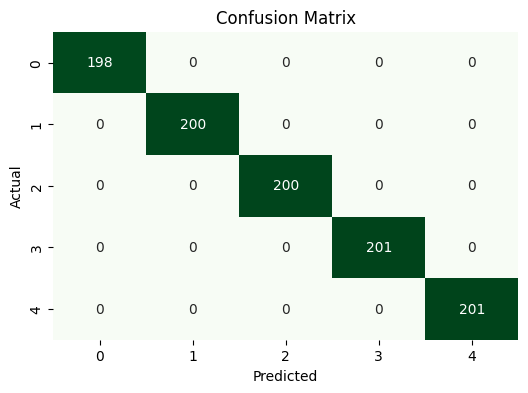

In [6]:
conf_matrix = confusion_matrix(target, final_predictions)

# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()